**Scraping: Άρθρα από το News 247 (https://www.news247.gr/latest/)**

Ξεκινώντας εισάγουμε τα απαραίτητα libraries.

In [53]:
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer





In [2]:
def get_page(page_number):
    headers = {
        "accept": "application/json",
        "accept-language": "en-US,en;q=0.9,el;q=0.8",
        "cache-control": "no-cache",
        "content-type": "application/json; charset=UTF-8",
        "pragma": "no-cache",
        "sec-ch-ua": "\" Not;A Brand\";v=\"99\", \"Google Chrome\";v=\"91\", \"Chromium\";v=\"91\"",
        "sec-ch-ua-mobile": "?0",
        "sec-fetch-dest": "empty",
        "sec-fetch-mode": "cors",
        "sec-fetch-site": "same-origin",
        "x-requested-with": "XMLHttpRequest",
    }
    req = requests.get("https://www.news247.gr/tourkia",headers=headers,json= {"pages":page_number})
    return req


In [3]:
def get_articles(content):
    html = BS(content, features='html.parser')
    articles = html.find_all('article',{"class": "article_left"})
    return articles

def parse_article(article):
    href = article.find('a')['href']
    title = article.find('a')['title']
    leadtext = article.find('p',{"class": "article__leadtext"}).text
    tag = article.find('a',{"class": "article__tag_section"}).text
    datetime = article.find('time').text
    datum = {
        'Title': title,
        'Href' : href,
        'Leadtext':leadtext,
        'Tag':tag,
        'Datetime': datetime
    }
    return datum
    
count = 0
page_count = 1
data = []
while(count < 500):
    page = get_page(page_count)
    page_count = page_count + 1
    articles = get_articles(page.content)
    for article in articles:
        datum = parse_article(article)
        data.append(datum)
        count = count + 1
df = pd.DataFrame(data)
df

,Title,Href,Leadtext,Tag,Datetime
0,"Η Τουρκία ""στήνει"" θερμό επεισόδιο και το ΝΑΤΟ...",https://www.news247.gr/politiki/i-toyrkia-stin...,Με το όνομα του τελευταίου σουλτάνου βαφτίζει ...,ΕΛΛΗΝΟΤΟΥΡΚΙΚΑ,14 Ιουνίου 2022 06:44
1,"Τουρκία: Συνάντηση Ερντογάν με Κοβάτσεφσκι - ""...",https://www.news247.gr/kosmos/toyrkia-synantis...,Με τον πρωθυπουργό της Βόρειας Μακεδονίας Ντιμ...,ΤΟΥΡΚΙΑ,13 Ιουνίου 2022 20:19
2,Μπαράζ υπερπτήσεων τουρκικών μαχητικών πάνω απ...,https://www.news247.gr/koinonia/mparaz-yperpti...,Σωρεία παραβιάσεων του FIR Αθηνών και του Εθνι...,ΤΟΥΡΚΙΑ,13 Ιουνίου 2022 19:09
3,Διαψεύδει η Ελλάδα τα τουρκικά δημοσιεύματα γι...,https://www.news247.gr/kosmos/diapseydei-i-ell...,Οι ελληνικές αρχές διαψεύδουν κατηγορηματικά τ...,ΤΟΥΡΚΙΑ,13 Ιουνίου 2022 18:02
4,"Στόλτενμπεργκ: ""Σημαντικά βήματα"" από τη Σουηδ...",https://www.news247.gr/kosmos/stoltenmpergk-si...,Βήματα προς την ικανοποίηση των αιτημάτων της ...,ΤΟΥΡΚΙΑ,13 Ιουνίου 2022 17:45
...,...,...,...,...,...
515,Ο Eρντογάν και επισήμως υποψήφιος στις προεδρι...,https://www.news247.gr/kosmos/o-erntogan-kai-e...,Μία ακόμα θητεία στον προεδρικό θώκο της Τουρκ...,ΤΟΥΡΚΙΑ,09 Ιουνίου 2022 19:31
516,"Ελλάδα σε Ερντογάν: ""Τίποτε δεν μπορεί να πλήξ...",https://www.news247.gr/politiki/athina-se-ernt...,Ο κυβερνητικός εκπρόσωπος Γ.Οικονόμου απάντησε...,ΕΛΛΗΝΟΤΟΥΡΚΙΚΑ,09 Ιουνίου 2022 16:10
517,"Νέα εμπρηστική δήλωση Ερντογάν: ""Να αποφύγει ό...",https://www.news247.gr/kosmos/nea-empristiki-d...,"Να μην εξοπλίζει νησιά που έχουν ""αποστρατιωτι...",ΕΡΝΤΟΓΑΝ,09 Ιουνίου 2022 14:19
518,ΥΠΕΞ: Ο τουρκικός αναθεωρητισμός την περίοδο 1...,https://www.news247.gr/politiki/ypex-o-toyrkik...,"Οι 16 χάρτες ""τεκμηριώνουν την έκταση του τουρ...",ΕΛΛΗΝΟΤΟΥΡΚΙΚΑ,09 Ιουνίου 2022 13:53


In [41]:
df['Year'] = df.Datetime.apply(lambda dt: dt.split(' ')[2])
df['Month'] = df.Datetime.apply(lambda dt: dt.split(' ')[1])
df['Day'] = df.Datetime.apply(lambda dt: dt.split(' ')[0])
df['Time'] = df.Datetime.apply(lambda dt: dt.split(' ')[3])

months = {
    'Ιανουαρίου' : '01',
    'Φεβρουαρίου' : '02', 
    'Μαρτίου' : '03',
    'Απριλίου' : '04',
    'Μαΐου' : '05',
    'Ιουνίου': '06',
    'Ιουλίου' : '07',
    'Αυγούστου' : '08',
    'Σεπτεμβρίου' : '09',
    'Οκτωβρίου' : '10',
    'Νοεμβρίου' : '11',
    'Δεκεμβρίου' : '12',
     
}

df['Date'] = df.apply(lambda row: f'{months[row.Month]}/{row.Day}/{row.Year} {row.Time}', axis='columns',result_type='expand')
df['Date'] = pd.to_datetime(df['Date'])


df


,Title,Href,Leadtext,Tag,Datetime,Year,Month,Day,Time,date,Date
0,"Η Τουρκία ""στήνει"" θερμό επεισόδιο και το ΝΑΤΟ...",https://www.news247.gr/politiki/i-toyrkia-stin...,Με το όνομα του τελευταίου σουλτάνου βαφτίζει ...,ΕΛΛΗΝΟΤΟΥΡΚΙΚΑ,14 Ιουνίου 2022 06:44,2022,Ιουνίου,14,06:44,14/06/2022 06:44,2022-06-14 06:44:00
1,"Τουρκία: Συνάντηση Ερντογάν με Κοβάτσεφσκι - ""...",https://www.news247.gr/kosmos/toyrkia-synantis...,Με τον πρωθυπουργό της Βόρειας Μακεδονίας Ντιμ...,ΤΟΥΡΚΙΑ,13 Ιουνίου 2022 20:19,2022,Ιουνίου,13,20:19,13/06/2022 20:19,2022-06-13 20:19:00
2,Μπαράζ υπερπτήσεων τουρκικών μαχητικών πάνω απ...,https://www.news247.gr/koinonia/mparaz-yperpti...,Σωρεία παραβιάσεων του FIR Αθηνών και του Εθνι...,ΤΟΥΡΚΙΑ,13 Ιουνίου 2022 19:09,2022,Ιουνίου,13,19:09,13/06/2022 19:09,2022-06-13 19:09:00
3,Διαψεύδει η Ελλάδα τα τουρκικά δημοσιεύματα γι...,https://www.news247.gr/kosmos/diapseydei-i-ell...,Οι ελληνικές αρχές διαψεύδουν κατηγορηματικά τ...,ΤΟΥΡΚΙΑ,13 Ιουνίου 2022 18:02,2022,Ιουνίου,13,18:02,13/06/2022 18:02,2022-06-13 18:02:00
4,"Στόλτενμπεργκ: ""Σημαντικά βήματα"" από τη Σουηδ...",https://www.news247.gr/kosmos/stoltenmpergk-si...,Βήματα προς την ικανοποίηση των αιτημάτων της ...,ΤΟΥΡΚΙΑ,13 Ιουνίου 2022 17:45,2022,Ιουνίου,13,17:45,13/06/2022 17:45,2022-06-13 17:45:00
...,...,...,...,...,...,...,...,...,...,...,...
515,Ο Eρντογάν και επισήμως υποψήφιος στις προεδρι...,https://www.news247.gr/kosmos/o-erntogan-kai-e...,Μία ακόμα θητεία στον προεδρικό θώκο της Τουρκ...,ΤΟΥΡΚΙΑ,09 Ιουνίου 2022 19:31,2022,Ιουνίου,09,19:31,09/06/2022 19:31,2022-06-09 19:31:00
516,"Ελλάδα σε Ερντογάν: ""Τίποτε δεν μπορεί να πλήξ...",https://www.news247.gr/politiki/athina-se-ernt...,Ο κυβερνητικός εκπρόσωπος Γ.Οικονόμου απάντησε...,ΕΛΛΗΝΟΤΟΥΡΚΙΚΑ,09 Ιουνίου 2022 16:10,2022,Ιουνίου,09,16:10,09/06/2022 16:10,2022-06-09 16:10:00
517,"Νέα εμπρηστική δήλωση Ερντογάν: ""Να αποφύγει ό...",https://www.news247.gr/kosmos/nea-empristiki-d...,"Να μην εξοπλίζει νησιά που έχουν ""αποστρατιωτι...",ΕΡΝΤΟΓΑΝ,09 Ιουνίου 2022 14:19,2022,Ιουνίου,09,14:19,09/06/2022 14:19,2022-06-09 14:19:00
518,ΥΠΕΞ: Ο τουρκικός αναθεωρητισμός την περίοδο 1...,https://www.news247.gr/politiki/ypex-o-toyrkik...,"Οι 16 χάρτες ""τεκμηριώνουν την έκταση του τουρ...",ΕΛΛΗΝΟΤΟΥΡΚΙΚΑ,09 Ιουνίου 2022 13:53,2022,Ιουνίου,09,13:53,09/06/2022 13:53,2022-06-09 13:53:00


In [5]:
tag_data = df.groupby(['Tag']).count()['Title'].sort_values(ascending=False)


day_data = df.groupby(['Day']).count()['Title']
(day_data,tag_data)

(Day
 08     13
 09    104
 10    143
 11     91
 12     78
 13     78
 14     13
 Name: Title, dtype: int64,
 Tag
 ΕΛΛΗΝΟΤΟΥΡΚΙΚΑ         208
 ΤΟΥΡΚΙΑ                117
 ΚΥΡΙΑΚΟΣ ΜΗΤΣΟΤΑΚΗΣ     65
 ΕΡΝΤΟΓΑΝ                39
 ΑΛΕΞΗΣ ΤΣΙΠΡΑΣ          13
 ΓΙΑΝΝΗΣ ΟΙΚΟΝΟΜΟΥ       13
 ΙΣΡΑΗΛ                  13
 ΚΥΠΡΟΣ                  13
 ΛΙΜΕΝΙΚΟ ΣΩΜΑ           13
 ΝΑΤΟ                    13
 ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ          13
 Name: Title, dtype: int64)

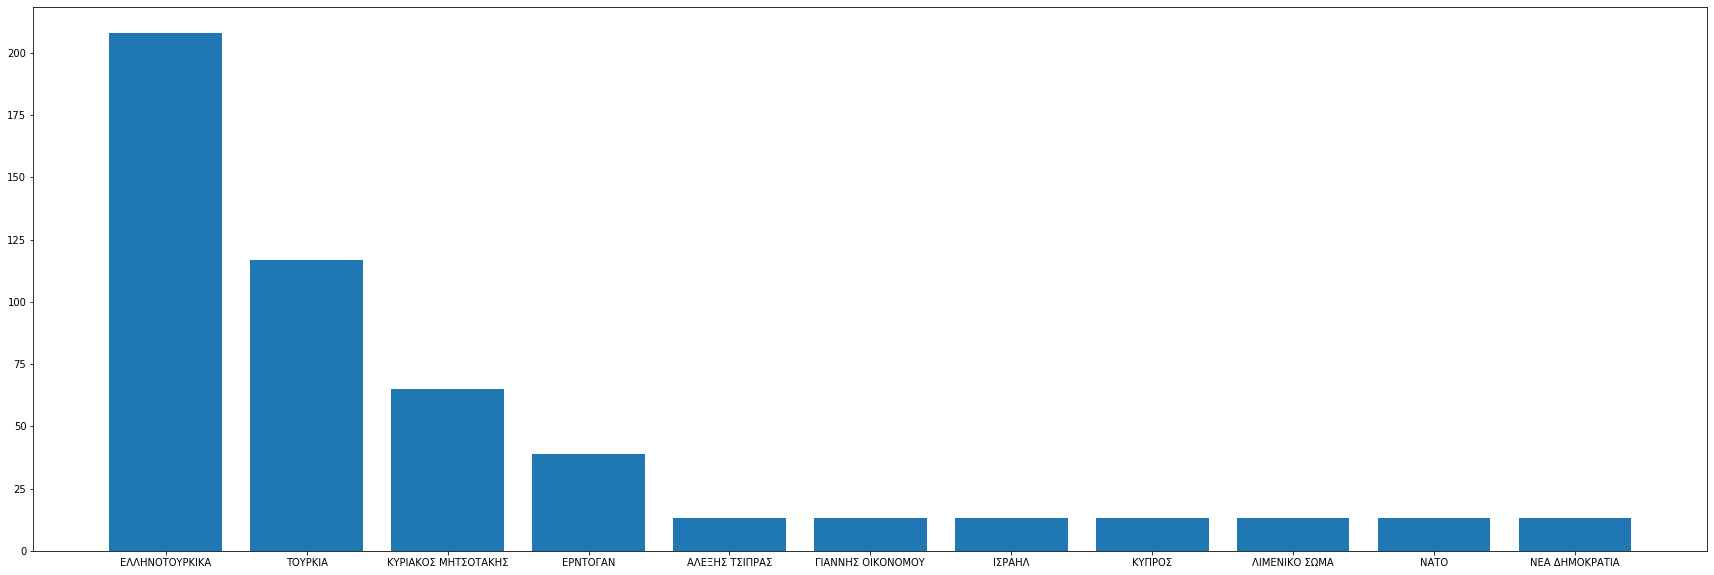

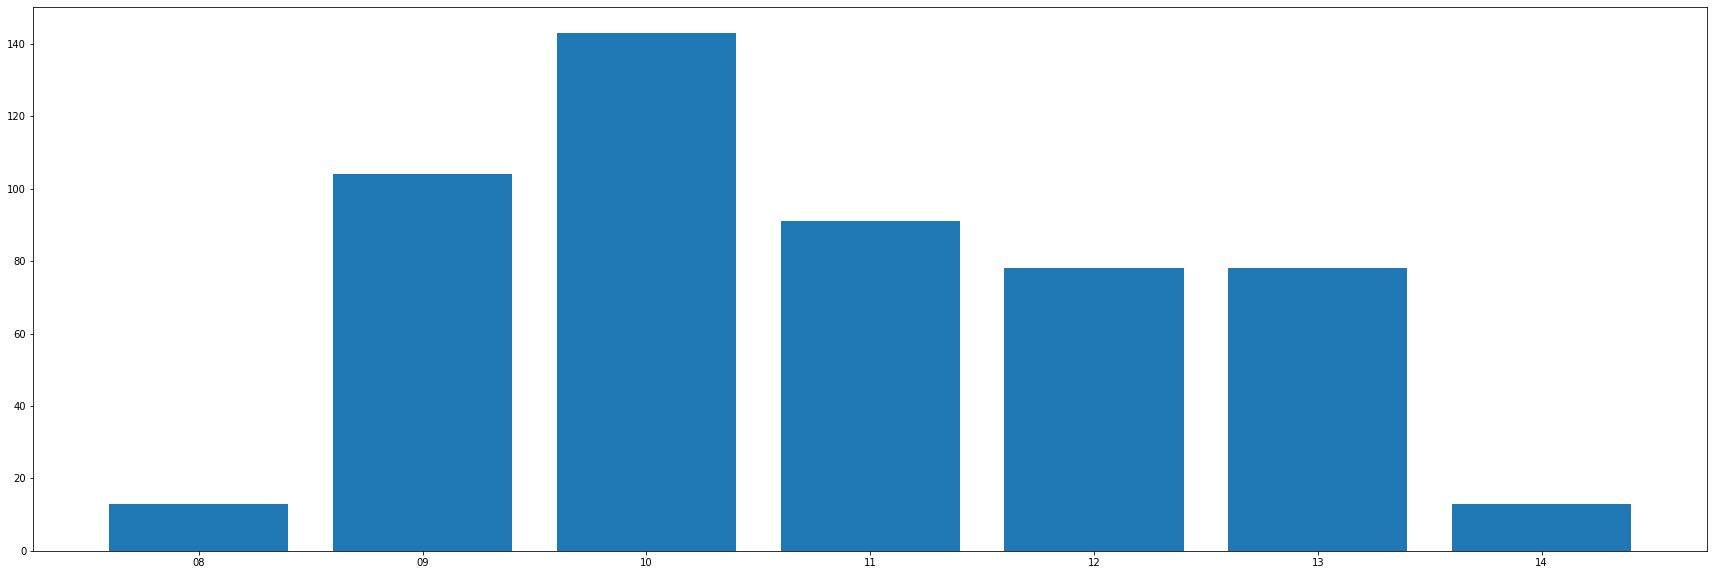

In [6]:
plt.figure(figsize=(30,10))
plt.bar(tag_data.keys(),tag_data,)
plt.show()

plt.figure(figsize=(30,10))
plt.bar(day_data.keys(),day_data,)
plt.show()

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

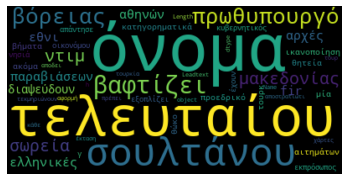

In [65]:
# Start with one review:
text = df.Leadtext
stop = stopwords.words('greek')
stop = stop + ['και','της','αλλά','από','τη','στους','κοι','τ','Σε','Δεν','ότι','Η','Ο','στα','στις','τους','τόσο'] + \
    ['αι', 'αλλ', 'αλλος', 'αλλοσ', 'αμα', 'απ', 'αρα', 'αυ', 'αυτος', 'αφ', 'γαρ', 'γουν', 'δαι', 'δαις', 'δαισ', 'δη', 'δι', 'δια', \
    'εαυτου', 'εγω', 'ει', 'ειμι', 'εις', 'εισ', 'ειτε', 'εκ', 'εμος', 'εμοσ', 'εν', 'εξ', 'επει', 'εστι', 'ετι', 'εφ', 'ης', 'ινα', \
    'καιτοι', 'καν', 'μεν', 'μητε', 'οδε', 'οθεν', 'οις', 'ον', 'οπερ', 'ος', 'οσ', 'οστις', 'οστισ', 'οτε', 'ου', 'ουδ', 'ουδε', 'ουδεις', 'ουδεισ', 'ουδεν', \
    'ουκ', 'ουν', 'ους', 'ουτε', 'ουτος', 'ουτοσ', 'ουτω', 'ουτως', 'ουτωσ', 'ουχ', 'ουχι', 'περι', 'προς', 'σος', 'σοσ', 'συ', 'συν', 'ταις', 'τας', 'τοιουτος', \
    'τοιουτοσ', 'τοις', 'τοσο', 'τουσ', 'τω', 'υμοσ', 'υπ', 'υπερ', 'υπο', 'ως', 'ωστε']
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stop).generate(str(text))
wordcloud
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:

word_count = Counter(" ".join(df["Leadtext"]).split())
word_count = {word.lower() : count for word, count in word_count.items() if not word.lower() in stop}
word_count = pd.DataFrame(data={
    'word': word_count.keys(),
    'count': word_count.values()
})

word_count.sort_values('count',ascending=False).head(15)


,word,count
66,τουρκία,104
81,ελλάδας,78
104,ερντογάν.,78
20,τούρκος,65
49,τουρκίας,52
80,δηλώσεις,52
4,ερντογάν,52
180,χώρα,52
253,ελλάδα,39
12,τουρκικά,39


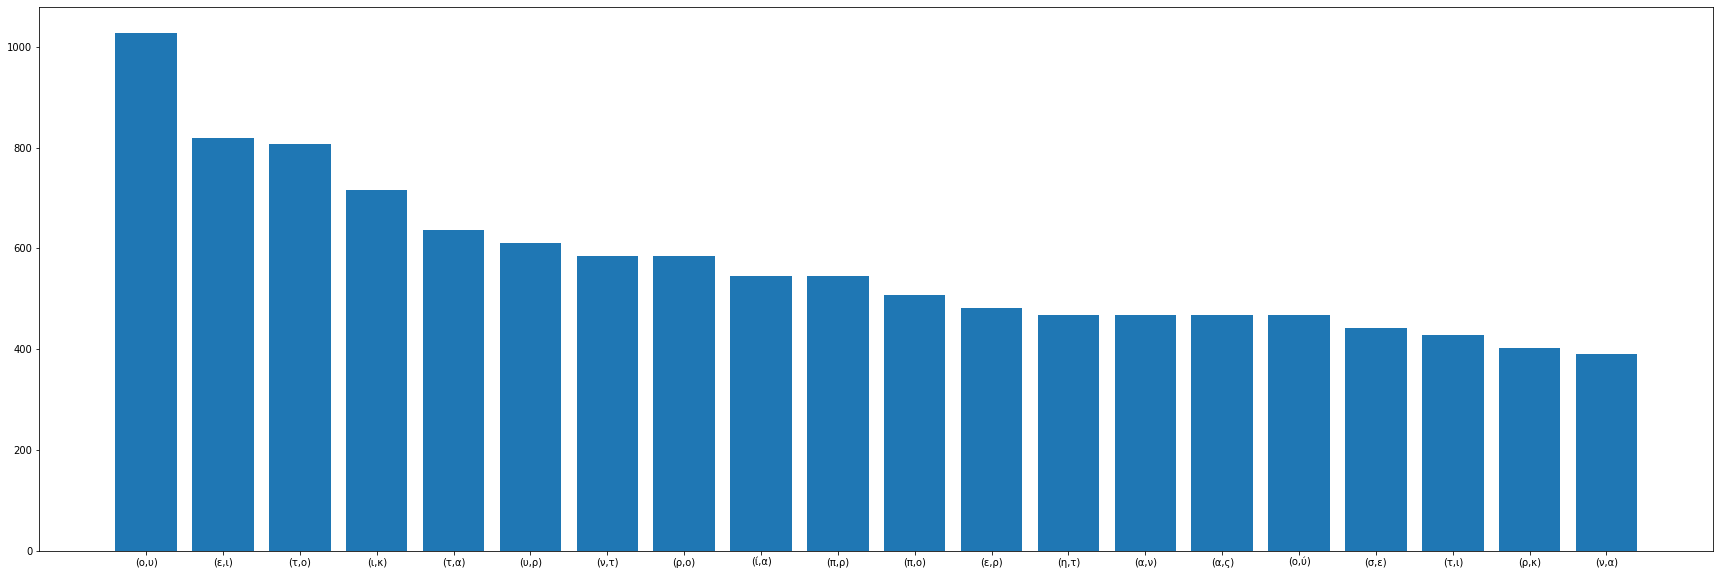

In [151]:
words = sum([row.split(' ') for row in text],[])
words = ''.join([word.lower().strip('"').strip('.') for word in words if word not in stop and len(word) >= 2])


digrams = pd.DataFrame(list(nltk.ngrams(words, 2)))

digrams['digram'] = [f'({x},{y})' for (x,y) in list(zip(list(digrams[0]),list(digrams[1])))]

digrams = digrams.groupby(['digram']).count()[0].sort_values(ascending=False).head(20)


plt.figure(figsize=(30,10))
plt.bar(digrams.keys(),digrams.values)
plt.show()

In [44]:
df.resample(rule='D',on='Date').count()

,Title,Href,Leadtext,Tag,Datetime,Year,Month,Day,Time,date,Date
Date,,,,,,,,,,,
2022-06-08,13,13,13,13,13,13,13,13,13,13,13
2022-06-09,104,104,104,104,104,104,104,104,104,104,104
2022-06-10,143,143,143,143,143,143,143,143,143,143,143
2022-06-11,91,91,91,91,91,91,91,91,91,91,91
2022-06-12,78,78,78,78,78,78,78,78,78,78,78
2022-06-13,78,78,78,78,78,78,78,78,78,78,78
2022-06-14,13,13,13,13,13,13,13,13,13,13,13


In [51]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)
emolex_df.tail(15)

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13146,13156,μαραμενο,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13147,13157,αλιμονο,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
13148,13158,επιδεινωνεται,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
13149,13159,αποσπω βιαια,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13150,13160,καρπος του χεριου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13151,13161,κλητηριο ενταλμα,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13152,13162,κατειργασμενος,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13153,13163,μαγια,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13154,13164,κιτρινο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13155,13165,κιτρινιζω,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= stop,
                      ngram_range=(1, 2),
                      lowercase = True
                      )
matrix = vec.fit_transform(df['Leadtext'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.shape


(520, 13161)

In [70]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [81]:
df['anger'] = wordcount_df[angry_words].sum(axis=1)
df['positivity'] = wordcount_df[positive_words].sum(axis=1)
df['joy'] = wordcount_df[joy_words].sum(axis=1)
df['disgust'] = wordcount_df[disgust_words].sum(axis=1)
df['surprise'] = wordcount_df[surprise_words].sum(axis=1)
df['trust'] = wordcount_df[trust_words].sum(axis=1)
df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
df['sadness'] = wordcount_df[sadness_words].sum(axis=1)
df['negative'] = wordcount_df[negative_words].sum(axis=1)
df['fear'] = wordcount_df[fear_words].sum(axis=1)
df

,Title,Href,Leadtext,Tag,Datetime,Year,Month,Day,Time,date,...,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,"Η Τουρκία ""στήνει"" θερμό επεισόδιο και το ΝΑΤΟ...",https://www.news247.gr/politiki/i-toyrkia-stin...,με το όνομα του τελευταίου σουλτάνου βαφτίζει ...,ΕΛΛΗΝΟΤΟΥΡΚΙΚΑ,14 Ιουνίου 2022 06:44,2022,Ιουνίου,14,06:44,14/06/2022 06:44,...,1,2,0,0,0,1,0,0,1,1
1,"Τουρκία: Συνάντηση Ερντογάν με Κοβάτσεφσκι - ""...",https://www.news247.gr/kosmos/toyrkia-synantis...,με τον πρωθυπουργό της βόρειας μακεδονίας ντιμ...,ΤΟΥΡΚΙΑ,13 Ιουνίου 2022 20:19,2022,Ιουνίου,13,20:19,13/06/2022 20:19,...,0,1,0,0,0,1,0,0,0,0
2,Μπαράζ υπερπτήσεων τουρκικών μαχητικών πάνω απ...,https://www.news247.gr/koinonia/mparaz-yperpti...,σωρεία παραβιάσεων του fir αθηνών και του εθνι...,ΤΟΥΡΚΙΑ,13 Ιουνίου 2022 19:09,2022,Ιουνίου,13,19:09,13/06/2022 19:09,...,0,0,0,0,0,0,0,0,0,0
3,Διαψεύδει η Ελλάδα τα τουρκικά δημοσιεύματα γι...,https://www.news247.gr/kosmos/diapseydei-i-ell...,οι ελληνικές αρχές διαψεύδουν κατηγορηματικά τ...,ΤΟΥΡΚΙΑ,13 Ιουνίου 2022 18:02,2022,Ιουνίου,13,18:02,13/06/2022 18:02,...,0,0,0,0,0,0,0,0,0,0
4,"Στόλτενμπεργκ: ""Σημαντικά βήματα"" από τη Σουηδ...",https://www.news247.gr/kosmos/stoltenmpergk-si...,βήματα προς την ικανοποίηση των αιτημάτων της ...,ΤΟΥΡΚΙΑ,13 Ιουνίου 2022 17:45,2022,Ιουνίου,13,17:45,13/06/2022 17:45,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Ο Eρντογάν και επισήμως υποψήφιος στις προεδρι...,https://www.news247.gr/kosmos/o-erntogan-kai-e...,μία ακόμα θητεία στον προεδρικό θώκο της τουρκ...,ΤΟΥΡΚΙΑ,09 Ιουνίου 2022 19:31,2022,Ιουνίου,09,19:31,09/06/2022 19:31,...,0,0,0,0,0,0,1,0,0,1
516,"Ελλάδα σε Ερντογάν: ""Τίποτε δεν μπορεί να πλήξ...",https://www.news247.gr/politiki/athina-se-ernt...,ο κυβερνητικός εκπρόσωπος γ.οικονόμου απάντησε...,ΕΛΛΗΝΟΤΟΥΡΚΙΚΑ,09 Ιουνίου 2022 16:10,2022,Ιουνίου,09,16:10,09/06/2022 16:10,...,0,1,0,0,0,2,0,0,0,0
517,"Νέα εμπρηστική δήλωση Ερντογάν: ""Να αποφύγει ό...",https://www.news247.gr/kosmos/nea-empristiki-d...,"να μην εξοπλίζει νησιά που έχουν ""αποστρατιωτι...",ΕΡΝΤΟΓΑΝ,09 Ιουνίου 2022 14:19,2022,Ιουνίου,09,14:19,09/06/2022 14:19,...,1,1,0,1,0,1,0,0,1,0
518,ΥΠΕΞ: Ο τουρκικός αναθεωρητισμός την περίοδο 1...,https://www.news247.gr/politiki/ypex-o-toyrkik...,"οι 16 χάρτες ""τεκμηριώνουν την έκταση του τουρ...",ΕΛΛΗΝΟΤΟΥΡΚΙΚΑ,09 Ιουνίου 2022 13:53,2022,Ιουνίου,09,13:53,09/06/2022 13:53,...,0,0,0,0,0,0,1,0,1,2


In [165]:
emotions = df.resample(rule='D',on='Date').sum()
emotions

,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
Date,,,,,,,,,,
2022-06-08,0,13,0,0,0,13,0,0,13,0
2022-06-09,13,52,0,13,0,91,26,0,26,39
2022-06-10,26,117,26,13,26,104,39,0,39,13
2022-06-11,13,91,13,39,26,65,39,52,91,52
2022-06-12,39,52,13,0,13,78,13,26,52,26
2022-06-13,0,26,13,13,13,13,13,0,0,13
2022-06-14,13,26,0,0,0,13,0,0,13,13


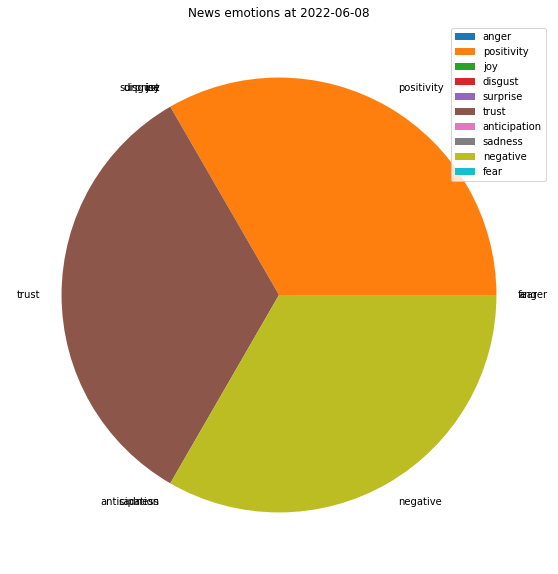

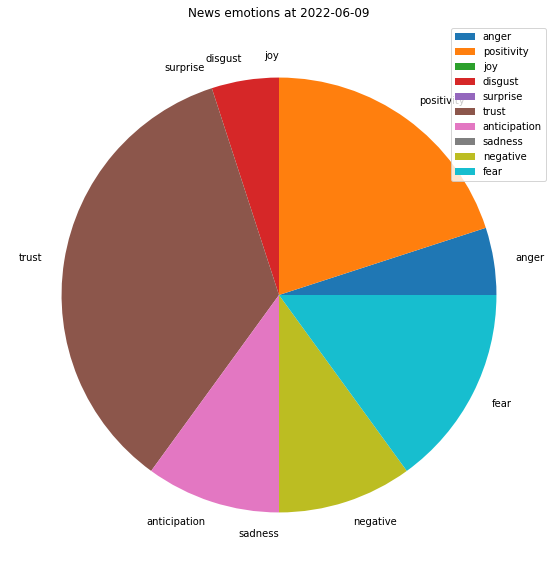

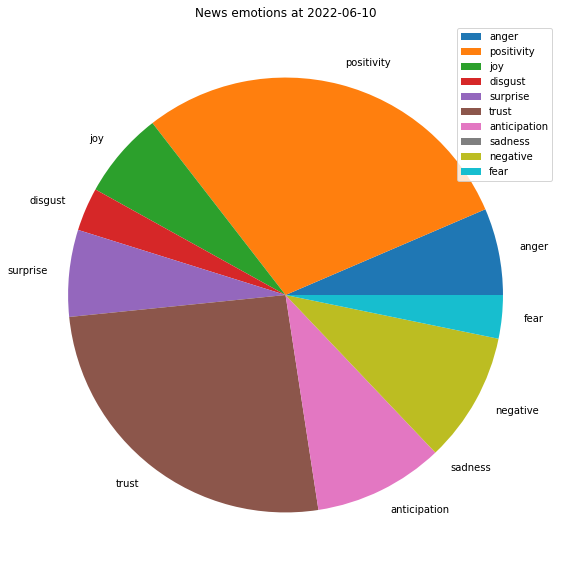

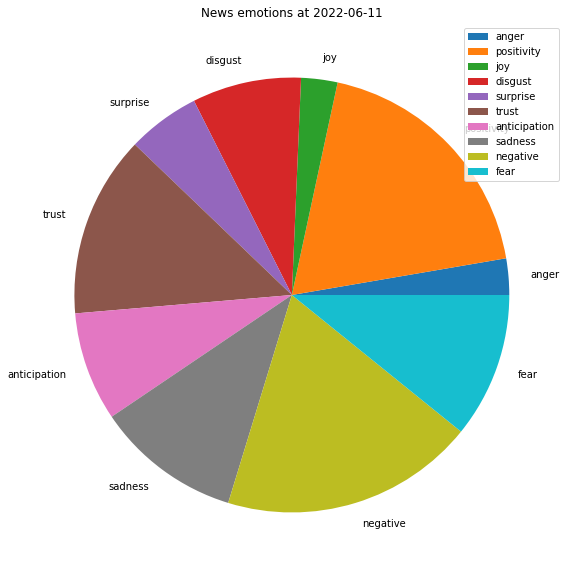

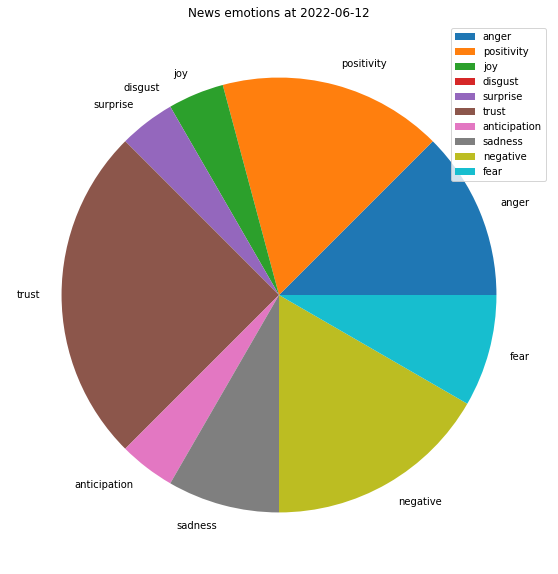

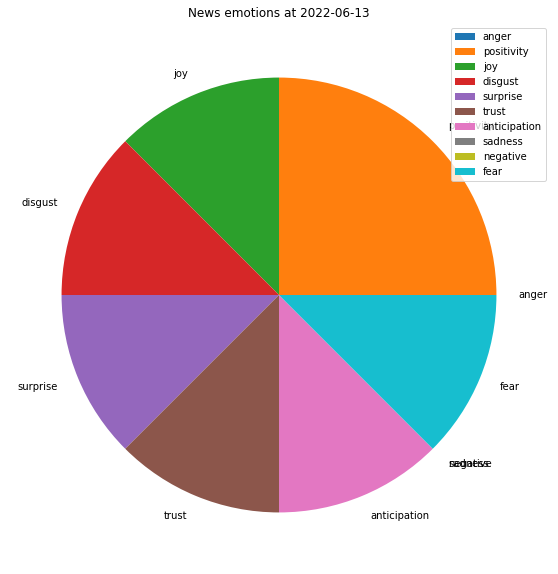

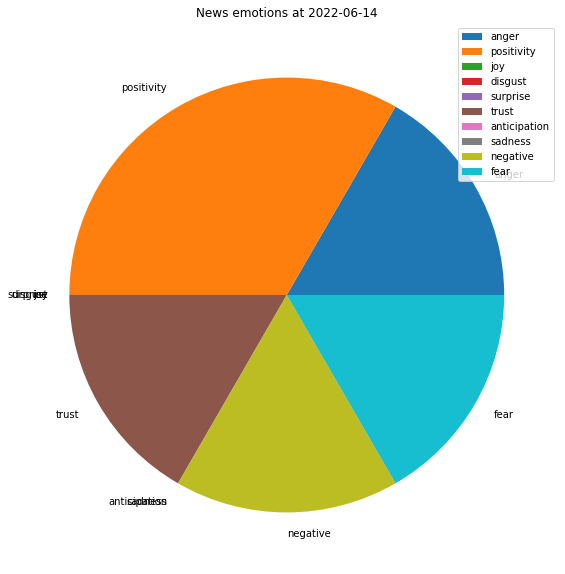

In [173]:
(rows,_) = emotions.shape
labels = emotions.columns




for i in range(rows):
    data = emotions.iloc[[i]].values[0].tolist()
    date = str(emotions.iloc[[i]].axes[0].values[0]).split('T')[0]
    plt.figure(figsize=(30,10))
    plt.pie(data,labels=labels,)
    plt.legend()
    plt.title(f'News emotions at {date}')
    plt.show()

